Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.decomposition import PCA

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Load and Explore the Dataset

Set the Path to the Dataset:

In [3]:
dataset_path = r'C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Phase V\Capstone_Project\Rice_Image_Dataset'

Explore Directory Structure

In [4]:
categories = os.listdir(dataset_path)
print(categories)


['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


Count Images in Each Category

In [5]:
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print(category_counts)


{'Arborio': 15000, 'Basmati': 15000, 'Ipsala': 15000, 'Jasmine': 15000, 'Karacadag': 15000}


Visualize Category Distribution

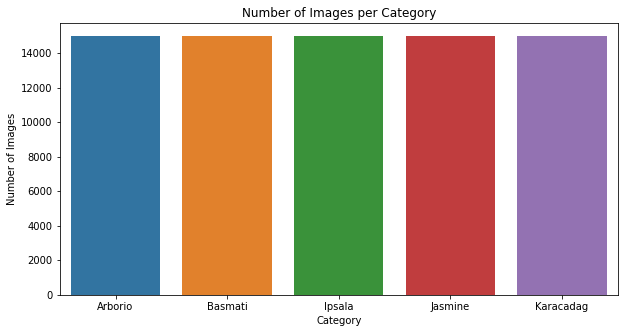

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


Visualize Sample Images

Visualize Random Images from Each Category

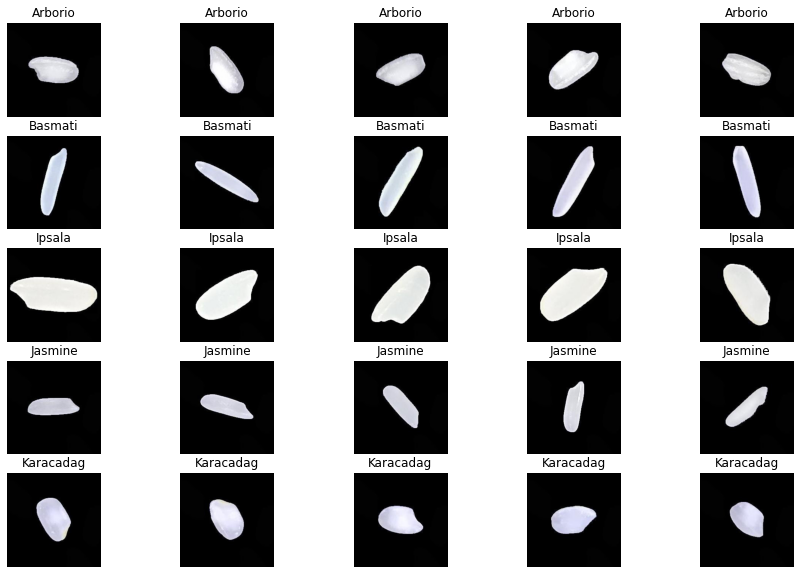

In [7]:
def visualize_sample_images(dataset_path, categories, num_images=5):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)
        for j in range(num_images):
            img = Image.open(os.path.join(category_path, images[j]))
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
    plt.show()

visualize_sample_images(dataset_path, categories)


Analyze Image Properties

Load a Sample of Images

In [8]:
def load_images(dataset_path, categories, num_images=100):
    data = []
    labels = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)[:num_images]
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            labels.append(category)
    return np.array(data), np.array(labels)

data, labels = load_images(dataset_path, categories)


Analyze Image Dimensions

In [9]:
image_shapes = [img.shape for img in data]
df_shapes = pd.DataFrame(image_shapes, columns=['Height', 'Width', 'Channels'])
print(df_shapes.describe())


       Height  Width  Channels
count   500.0  500.0     500.0
mean    250.0  250.0       3.0
std       0.0    0.0       0.0
min     250.0  250.0       3.0
25%     250.0  250.0       3.0
50%     250.0  250.0       3.0
75%     250.0  250.0       3.0
max     250.0  250.0       3.0


Visualize Image Dimensions

C:\Users\Kish\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kish\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


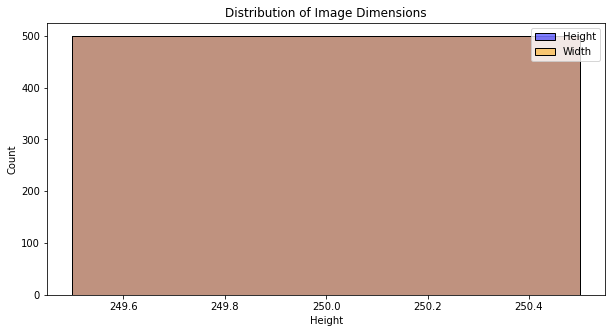

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df_shapes['Height'], kde=True, label='Height', color='blue')
sns.histplot(df_shapes['Width'], kde=True, label='Width', color='orange')
plt.legend()
plt.title('Distribution of Image Dimensions')
plt.show()


Preprocess the Images

Resize Images

In [11]:
target_size = (128, 128)

def preprocess_images(data, target_size):
    data_resized = [cv2.resize(img, target_size) for img in data]
    return np.array(data_resized)

data_resized = preprocess_images(data, target_size)


Normalize images

In [12]:
data_normalized = data_resized / 255.0


The reason we divide by 255.0 when normalizing image data is because the pixel values in images typically range from 0 to 255. By dividing each pixel value by 255.0, we scale these values to a range of 0 to 1, which is a common practice in image preprocessing for machine learning models. This normalization helps to standardize the input data, which can improve the performance and convergence of the machine learning algorithms.

Benefits:

Consistency: Normalized data helps in maintaining consistency across different datasets.

Improved Model Performance: Many machine learning models and neural networks perform better with normalized data because it can lead to faster convergence during training and sometimes improved accuracy.

Reduced Numerical Instability: Normalization can help in reducing numerical instability in computations.

Analyze Image Content

Mean and Standard Deviation of Images

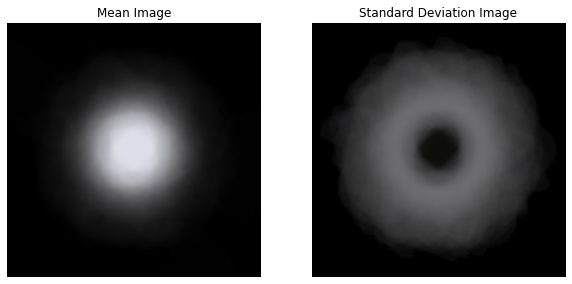

In [13]:
mean_image = np.mean(data_normalized, axis=0)
std_image = np.std(data_normalized, axis=0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mean_image)
plt.title('Mean Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_image)
plt.title('Standard Deviation Image')
plt.axis('off')

plt.show()


Principal Component Analysis (PCA)

In [14]:
from sklearn.decomposition import PCA

data_flattened = data_normalized.reshape(len(data_normalized), -1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_flattened)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='viridis')
plt.title('PCA of Images')
plt.show()


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Flatten the data for PCA
data_flattened = data_normalized.reshape(len(data_normalized), -1)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_flattened)

# Create a DataFrame for the PCA results for easier plotting with seaborn
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['label'] = labels

# Plot the PCA results
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='label', data=pca_df, palette='viridis')
plt.title('PCA of Images')
plt.show()


Interpret and Visualize PCA Results

Visualize Principal Components:
Use scatter plots or other visualizations to interpret the separation between different classes.

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='label', data=pca_df, palette='viridis')
plt.title('PCA of Images')
plt.show()


In [ ]:
# Analyze Variance Explained:
# Check the explained variance to understand how much information is retained by the principal components.

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')


Feature Selection and Dimensionality Reduction

In [ ]:
# Decide on the Number of Components:
# Determine how many principal components to retain based on the explained variance.

In [ ]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()


In [ ]:
# Retain Selected Components:
# If we decide to reduce dimensionality based on PCA, we will use the selected number of components for further processing.

In [ ]:
num_components = 10  # Example number of components to retain
pca = PCA(n_components=num_components)
data_reduced = pca.fit_transform(data_flattened)


Data Preparation for Modeling


Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_reduced, labels, test_size=0.2, random_state=42)


Encode the categorical labels into numerical format

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


### Model Training